# White-box Attack on CIFAR10

In [1]:
import sys

import torch
import torch.nn as nn

import os
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "max_split_size_mb:24"


sys.path.insert(0, '..')
import torchattacks

## Load model and data

In [2]:
sys.path.insert(0, '..')
import robustbench
from robustbench.data import load_cifar10
from robustbench.utils import load_model, clean_accuracy

#images, labels = load_cifar10(n_examples=5)
images, labels = load_cifar10()
print('[Data loaded]')

device = "cuda"
model = load_model('Standard', norm='Linf').to(device)
acc = clean_accuracy(model, images.to(device), labels.to(device))
print('[Model loaded]')
print('Acc: %2.2f %%'%(acc*100))

Files already downloaded and verified
[Data loaded]
[Model loaded]
Acc: 94.78 %


## Adversarial Attack

In [3]:
from torchattacks import PGD, CosPGD
from utils import imshow, get_pred

In [4]:
pgd_atk = PGD(model, eps=8/255, alpha=2/225, steps=10, random_start=True)
print(pgd_atk)

PGD(model_name=WideResNet, device=cuda:0, attack_mode=default, targeted=False, normalization_used=False, eps=0.03137254901960784, alpha=0.008888888888888889, steps=10, random_start=True)


In [5]:
cospgd_atk = CosPGD(model, eps=8/255, alpha=2/225, steps=10, random_start=True)
print(cospgd_atk)

CosPGD(model_name=WideResNet, device=cuda:0, attack_mode=default, targeted=False, normalization_used=False, eps=0.03137254901960784, alpha=0.008888888888888889, steps=10, random_start=True)


In [ ]:
# When normalization used:
# atk.set_normalization_used(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

In [ ]:
test_loader = torch.utils.data.DataLoader(
    (images, labels),
    batch_size=128,
    shuffle=False,
    num_workers=128,
    pin_memory=True
)

In [6]:
pgd_adv_images = pgd_atk(images[:100], labels[:100])

In [6]:
cospgd_adv_images = cospgd_atk(images[:100], labels[:100])

OutOfMemoryError: CUDA out of memory. Tried to allocate 6.10 GiB (GPU 0; 23.64 GiB total capacity; 13.81 GiB already allocated; 1.30 GiB free; 13.84 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

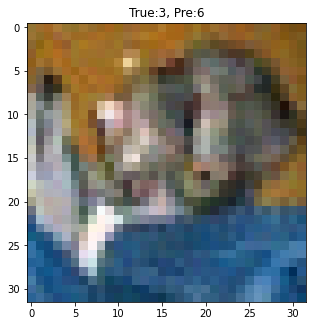

In [6]:
idx = 0
pre = get_pred(model, pgd_adv_images[idx:idx+1], device)
imshow(pgd_adv_images[idx:idx+1], title="True:%d, Pre:%d"%(labels[idx], pre))

In [ ]:
idx = 0
pre = get_pred(model, cospgd_adv_images[idx:idx+1], device)
imshow(cospgd_adv_images[idx:idx+1], title="True:%d, Pre:%d"%(labels[idx], pre))